> # 캐글 - 타이타닉 데이터 분석 및 예측

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [9]:
# 데이터 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Age를 Sex별 평균으로 결측치를 채우는 법
train.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


In [11]:
age_mean = train.groupby('Sex')['Age'].mean()

In [12]:
train.loc[(train['Sex']=='female') & (train['Age'].isnull()), 'Age'] = int(age_mean[0])
train.loc[(train['Sex']=='male') & (train['Age'].isnull()), 'Age'] = int(age_mean[1])

In [13]:
# 나이 소수점 반올림
train['Age'] = train['Age'].round(0)
train[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,27.0
889,26.0


In [14]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
F2             3
              ..
B82 B84        1
A31            1
B41            1
B94            1
B19            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
train['Cabin'] = train['Cabin'].fillna('N')

In [16]:
# Cabin 결측치 = N, 나머지는 앞 한글자만 적용
train['Cabin'] = train['Cabin'].apply(lambda x:x[0])
a =[]
for i in train['Cabin']:
    a.append(i[0])
a1 = pd.Series(a).head(40)
b1 = train.Cabin.head(40)

In [17]:
train.Cabin.head(40)

0     N
1     C
2     N
3     C
4     N
5     N
6     E
7     N
8     N
9     N
10    G
11    C
12    N
13    N
14    N
15    N
16    N
17    N
18    N
19    N
20    N
21    D
22    N
23    A
24    N
25    N
26    N
27    C
28    N
29    N
30    N
31    B
32    N
33    N
34    N
35    N
36    N
37    N
38    N
39    N
Name: Cabin, dtype: object

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train['Embarked'].isnull().sum()

2

In [20]:
# Embarked의 결측치를 가장 많은 데이터인 S로 적용
train['Embarked'] = train['Embarked'].fillna('S')

In [21]:
# 사망자 생존자 수 인원
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
# 알아보기 쉽도록 새로운 라벨 추가
train['Survived_label'] = train['Survived'].replace(0, 'Dead').replace(1, 'Survived')

In [23]:
train[['Survived_label']].head(10)

,Survived_label
0,Dead
1,Survived
2,Survived
3,Survived
4,Dead
5,Dead
6,Dead
7,Dead
8,Survived
9,Survived


In [24]:
#생존률 구하기
temp = train['Survived'].value_counts()
# survival_rate = temp[1]/(temp[0] + temp[1])*100
survival_rate = temp[1]/temp.sum() * 100

In [25]:
print(f'생존률은 {survival_rate:.1f}% 입니다.')

생존률은 38.4% 입니다.


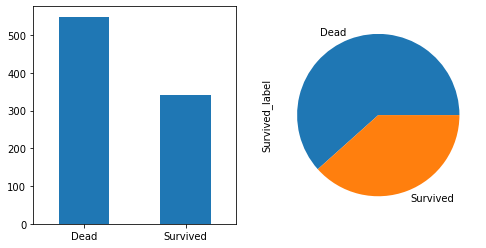

In [26]:
#생존자 시각화하기
f,ax=plt.subplots(1,2,figsize=(8,4))
train['Survived_label'].value_counts().plot(kind='bar',rot='0', ax=ax[0])
train['Survived_label'].value_counts().plot(kind='pie',ax=ax[1])
plt.show()

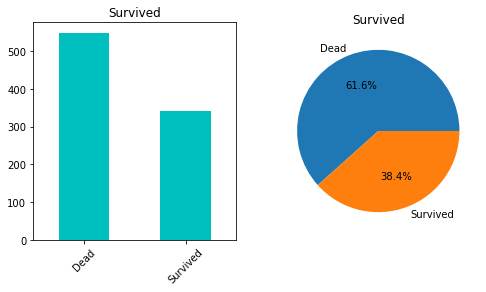

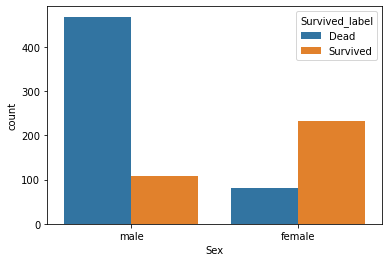

In [27]:
plt.subplot(1,2,1)
train['Survived_label'].value_counts().plot.bar(figsize=(4,4), rot='45', color='c', title='Survived')
plt.subplot(1,2,2)
train['Survived_label'].value_counts().plot(kind='pie', figsize=(8,4), title='Survived', ylabel='', autopct='%.1f%%')
plt.figure()
sns.countplot('Sex', data = train, hue='Survived_label')
plt.show()

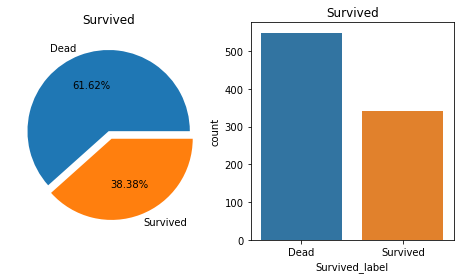

In [28]:
f, ax=plt.subplots(1,2,figsize=(8,4))
train['Survived_label'].value_counts().plot.pie(explode=[0,0.1], autopct='%.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived_label', data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [29]:
#객실 데이터 정리 및 시각화
train['Pclass_label'] = train['Pclass'].replace(1, 'First Class').replace(2, 'Business').replace(3, 'Economy')

In [30]:
train['Pclass_label'].head()

0        Economy
1    First Class
2        Economy
3    First Class
4        Economy
Name: Pclass_label, dtype: object

Text(0, 0.5, 'class')

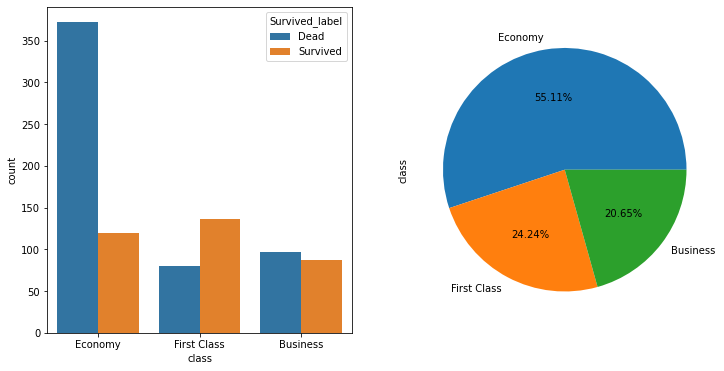

In [31]:
f, ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Pclass_label', data=train, hue='Survived_label', ax=ax[0]).set_xlabel('class')
train['Pclass_label'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
ax[1].set_ylabel('class')

First Class에 탄 사람들이 비교적 생존자 비율이 많다는 것을 알 수 있음.

In [32]:
# 출발지 데이터 정리 및 시각화
train['Embarked_label'] = train['Embarked'].replace('S', 'Southampton').replace('C', 'Cherbourg').replace('Q', 'Queenstown')

train[['Embarked_label']].head()

,Embarked_label
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton


<AxesSubplot:xlabel='Embarked_label', ylabel='count'>

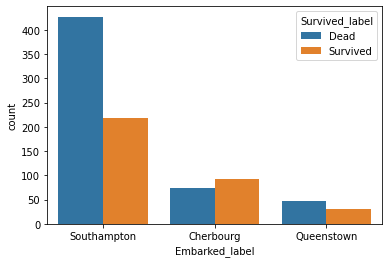

In [33]:
sns.countplot('Embarked_label', data=train, hue='Survived_label')

이를 통해서는 특별한 인사이트를 얻지 못했다.

## **가설세우기**  

### 탐색적 데이터 분석(EDA) 과정

**1) 타이타닉이 어떻게 침몰했는지?!**
앞부분이 먼저 추락했기 때문에 앞부분에 객실이 있던 3등급 탑승객들이 많이 사망했을 것이라는 분석 결과가 있다.  
  
**2) 이름**  
중요한 정보가 없을 것 같지만, Mr. Mrs. 등 결혼 여부를 알 수 있다.  
  
**3) 성별**   
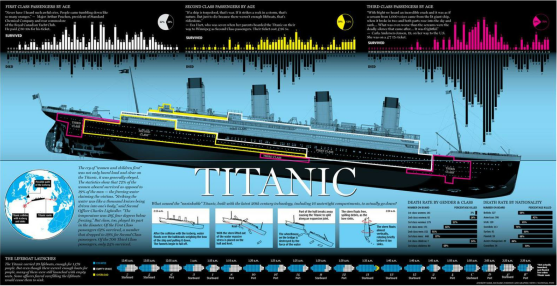

<AxesSubplot:xlabel='Sex', ylabel='count'>

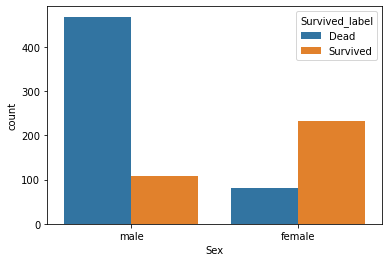

In [34]:
sns.countplot('Sex', data=train, hue='Survived_label')

를 보면 여자들이 살아남을 확률이 남자보다 높았다. 라는 가설을 세울 수 있다.  
**4) 객실**  
1. First Class에 탄 사람들이 생존률이 더 높았다.  
2. Cabin

<AxesSubplot:xlabel='Cabin', ylabel='count'>

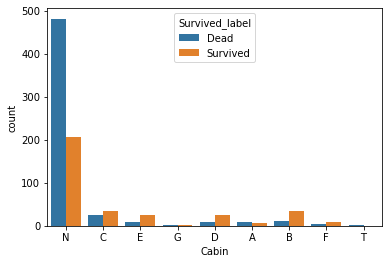

In [35]:
sns.countplot('Cabin', hue='Survived_label', data=train)

Cabin 데이터가 있는사람과 없는사람의 생존률 간의 의미있는 차이를 발견할 수 있다.

**5) 나이**  

<AxesSubplot:>

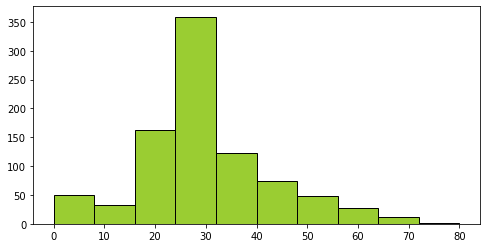

In [36]:
# 나이분포
train['Age'].hist(bins=10, figsize=(8,4), grid=False, edgecolor='black', color='yellowgreen')
# grid : 빗금 설정, edgecolor : 그래프 테두리 색

seaborn의 커널 밀도 추정(KDE) 그래프를 이용해 그려보면

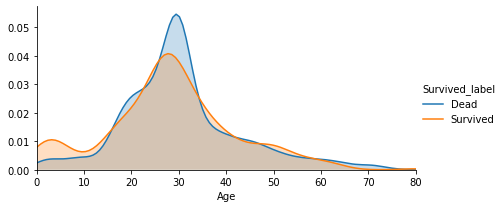

In [37]:
f = sns.FacetGrid(train, hue='Survived_label', aspect=2)
f.map(sns.kdeplot, 'Age', shade=True)
f.set(xlim=(0,train['Age'].max())) #x축 범위는 0 ~ Age의 최대치 까지만
f.add_legend()

20, 30대 청년들은 죽은사람이 더 많다는 것을 알 수 있다.  
반면 10세 이하 유아, 어린이들은 많이 살아남은 것을 확인할 수 있다.

**6) 형제, 배우자**  
함께 탄 배우자와 형제 수를 의미하는 SibSp를 이용

<AxesSubplot:xlabel='SibSp', ylabel='count'>

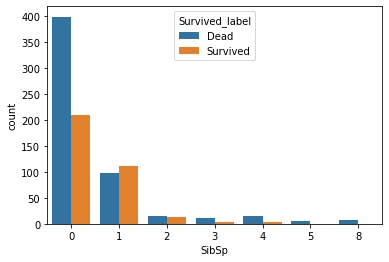

In [38]:
sns.countplot(data=train, x='SibSp', hue="Survived_label")

특별히 관련 없는 것 같이 느껴진다. 혼자 탄 사람이 사망률이 높은가?

**7) 부모, 자식**  
함께 탄 부모 또는 자녀의 수를 의미하는 Parch를 이용

<AxesSubplot:xlabel='Parch', ylabel='count'>

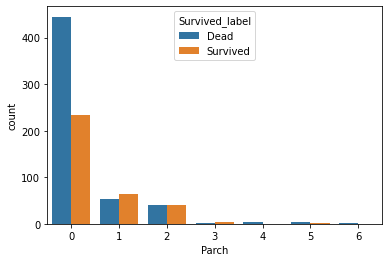

In [39]:
sns.countplot('Parch', data=train, hue='Survived_label')

혼자 탄 사람이 사망률이 높은 것처럼 보인다.
  
그럼 가족 없이 혼자탄 사람들만 따로 저장해서 보자.

In [40]:
train.loc[(train['SibSp'] == 0) & (train['Parch'] == 0), 'Single'] = 'Single'
train.loc[(train['SibSp'] != 0) | (train['Parch'] != 0), 'Single'] = 'Family'

train[['SibSp', 'Parch', 'Single']]

,SibSp,Parch,Single
0,1,0,Family
1,1,0,Family
2,0,0,Single
3,1,0,Family
4,0,0,Single
...,...,...,...
886,0,0,Single
887,0,0,Single
888,1,2,Family
889,0,0,Single


In [41]:
# Single과 Family 각각의 생존율
pd.pivot_table(data=train, index='Single', values='Survived')
# train.groupby('Single')[['Survived']].mean()

,Survived
Single,
Family,0.505650
Single,0.303538


In [42]:
#가족 전체수 합치기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 #자기자신 1
pd.pivot_table(train, index='FamilySize', values='Survived')

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

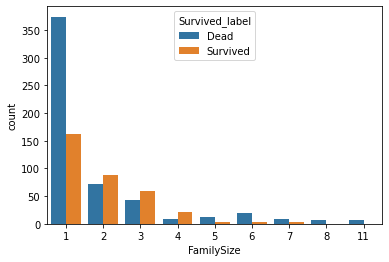

In [43]:
# 가족수에 따른 생존률
sns.countplot(data=train, x='FamilySize', hue='Survived_label')

혼자인 사람은 생존률이 낮은 것으로 보인다.  
  
-1명 : Single  
-2명~4명 : Nuclear  
-5명 이상 : Big  

In [44]:
train.loc[train['FamilySize'] ==1, 'FamilySize_label'] = 'Single'
train.loc[(train['FamilySize'] >1) & (train['FamilySize'] < 5), 'FamilySize_label'] = 'Nuclear'
train.loc[train['FamilySize'] >= 5, 'FamilySize_label'] = 'Big'

train[['FamilySize_label']].head(5)

,FamilySize_label
0,Nuclear
1,Nuclear
2,Single
3,Nuclear
4,Single


<AxesSubplot:xlabel='FamilySize_label', ylabel='count'>

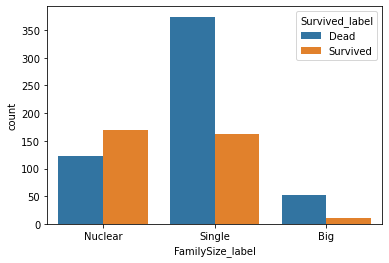

In [45]:
sns.countplot(data=train, x='FamilySize_label', hue='Survived_label')